In [203]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline 
from sklearn.preprocessing import MinMaxScaler, RobustScaler #normalizar os dados
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [209]:
minmax_scalar = MinMaxScaler() #normalizar os dados
#robust_scalar = RobustScaler() #normalizar os dados

In [210]:
#cross validartion
cv = StratifiedKFold(n_splits=5, random_state=42)

C:\Users\Usuario\Anaconda3\envs\aceleradev_2020\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [211]:
#Definindos os classificadores utilizados. Utilizarei apenas alguns para fins de comparação, mas basta remover
# os comentários nas linhas para adicionar os demais. 
RANDOM_SEED = 42
classifiers = [
    ('LogisticRegression', LogisticRegression()),#(solver='lbfgs', C=1e5, multi_class='multinomial')),
    ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()),
    #('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()),
    #('MLPClassifier', MLPClassifier(activation = 'relu',
    #              alpha=0.01,
    #              hidden_layer_sizes=(100,),
    #              learning_rate='constant',
    #              max_iter=400,
    #              solver='adam')),
    ('XGBClassifier',XGBClassifier()),
    #('KNeighborsClassifier', KNeighborsClassifier(3)),
    #('SVC',SVC(kernel="rbf", C=0.025, probability=True)),
    #('NuSVC', NuSVC(probability=True)),
    #('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier(n_estimators=200, 
                           max_features='sqrt',
                           random_state=RANDOM_SEED,
                           class_weight='balanced')),
    #('AdaBoostClassifier', AdaBoostClassifier()),
    #('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('GaussianNB', GaussianNB()),
    ]

### Carregando os dados

In [212]:
train = pd.read_csv("train.csv")
train.drop('Unnamed: 0', axis=1, inplace=True)

test = pd.read_csv("test.csv")

In [213]:
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

Utilizando apenas as features em comum em ambos os datasets

In [217]:
train = train[['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047','IN_TREINEIRO']]

In [218]:
train.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,IN_TREINEIRO
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,NaN,A,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,D,D,C,A,A,A,NaN,A,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,H,E,E,C,B,C,F,D,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,E,D,C,A,A,B,F,A,0


In [219]:
Geral = pd.DataFrame({'colunas':train.columns,
                      'tipo':train.dtypes,
                      'qtd NaN':train.isna().sum(),
                      '% NaN':train.isna().sum()/train.shape[0]})
Geral

,colunas,tipo,qtd NaN,% NaN
NU_INSCRICAO,NU_INSCRICAO,object,0,0.000000
CO_UF_RESIDENCIA,CO_UF_RESIDENCIA,int64,0,0.000000
SG_UF_RESIDENCIA,SG_UF_RESIDENCIA,object,0,0.000000
NU_IDADE,NU_IDADE,int64,0,0.000000
TP_SEXO,TP_SEXO,object,0,0.000000
TP_COR_RACA,TP_COR_RACA,int64,0,0.000000
TP_NACIONALIDADE,TP_NACIONALIDADE,int64,0,0.000000
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0,0.000000
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64,0,0.000000
TP_ESCOLA,TP_ESCOLA,int64,0,0.000000


As colunas 'Q027', 'TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO' serão excluidas devido a falta de informação para completá-las e o grande número de dados faltantes

In [220]:
train.drop(['Q027', 'TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO'], axis=1, inplace=True)
test.drop(['Q027', 'TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO'], axis=1, inplace=True)

No ENEM de 2016 as provas de linguages, códigos, matemática e redação foram realizadas no mesmo dia. Se os alunos não frequentaram o dia da prova de ciências humanas ['TP_PRESENCA_LC'] ou foram eliminados as notas para esses casos são nulas

In [221]:
completa_zero = ['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO','NU_NOTA_LC']

In [222]:
train.loc[train[train['TP_PRESENCA_LC']== 0].index, completa_zero] = 0
train.loc[train[train['TP_PRESENCA_LC']== 2].index, completa_zero] = 0
test.loc[test[test['TP_PRESENCA_LC']== 0].index, completa_zero] = 0
test.loc[test[test['TP_PRESENCA_LC']== 2].index, completa_zero] = 0

Se o aluno não compareceu para fazer a prova o status da redação é branco (categoria 4) se é eliminado é anulada (categoria 2)

In [223]:
train.loc[train[train['TP_PRESENCA_LC']== 0].index, 'TP_STATUS_REDACAO'] = 4
train.loc[train[train['TP_PRESENCA_LC']== 2].index,'TP_STATUS_REDACAO'] = 2
test.loc[test[test['TP_PRESENCA_LC']== 0].index,'TP_STATUS_REDACAO'] = 4
test.loc[test[test['TP_PRESENCA_LC']== 2].index,'TP_STATUS_REDACAO'] = 2

Quem não frequetou o dia de ciências da natureza terá sua nota zerada tembem

In [224]:
train.loc[train[train['TP_PRESENCA_CH']== 0].index,'NU_NOTA_CH'] = 0
train.loc[train[train['TP_PRESENCA_CH']== 2].index, 'NU_NOTA_CH'] = 0
test.loc[test[test['TP_PRESENCA_CH']== 0].index, 'NU_NOTA_CH'] = 0
test.loc[test[test['TP_PRESENCA_CH']== 2].index, 'NU_NOTA_CH'] = 0

In [225]:
train.loc[train[train['TP_PRESENCA_CN']== 0].index, 'NU_NOTA_CN'] = 0
train.loc[train[train['TP_PRESENCA_CN']== 2].index, 'NU_NOTA_CN'] = 0
test.loc[test[test['TP_PRESENCA_CN']== 0].index, 'NU_NOTA_CN'] = 0
test.loc[test[test['TP_PRESENCA_CN']== 2].index, 'NU_NOTA_CN'] = 0

In [226]:
Geral_train = pd.DataFrame({'colunas':train.columns,
                      'tipo':train.dtypes,
                      'qtd NaN':train.isna().sum(),
                      '% NaN':train.isna().sum()/train.shape[0]})
Geral_train

,colunas,tipo,qtd NaN,% NaN
NU_INSCRICAO,NU_INSCRICAO,object,0,0.0
CO_UF_RESIDENCIA,CO_UF_RESIDENCIA,int64,0,0.0
SG_UF_RESIDENCIA,SG_UF_RESIDENCIA,object,0,0.0
NU_IDADE,NU_IDADE,int64,0,0.0
TP_SEXO,TP_SEXO,object,0,0.0
TP_COR_RACA,TP_COR_RACA,int64,0,0.0
TP_NACIONALIDADE,TP_NACIONALIDADE,int64,0,0.0
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0,0.0
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64,0,0.0
TP_ESCOLA,TP_ESCOLA,int64,0,0.0


In [227]:
Geral_test = pd.DataFrame({'colunas':test.columns,
                      'tipo':test.dtypes,
                      'qtd NaN':test.isna().sum(),
                      '% NaN':test.isna().sum()/train.shape[0]})
Geral_test

,colunas,tipo,qtd NaN,% NaN
NU_INSCRICAO,NU_INSCRICAO,object,0,0.0
CO_UF_RESIDENCIA,CO_UF_RESIDENCIA,int64,0,0.0
SG_UF_RESIDENCIA,SG_UF_RESIDENCIA,object,0,0.0
NU_IDADE,NU_IDADE,int64,0,0.0
TP_SEXO,TP_SEXO,object,0,0.0
TP_COR_RACA,TP_COR_RACA,int64,0,0.0
TP_NACIONALIDADE,TP_NACIONALIDADE,int64,0,0.0
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0,0.0
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64,0,0.0
TP_ESCOLA,TP_ESCOLA,int64,0,0.0


### Analisando IN_TREINEIRO

In [228]:
var_numerica = ['NU_IDADE','NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
              'NU_NOTA_COMP5', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

Convertendo as variáveis categóricas para numéricas

In [229]:
train['TP_SEXO'] = pd.get_dummies(train['TP_SEXO'], drop_first=1)
test['TP_SEXO'] = pd.get_dummies(test['TP_SEXO'], drop_first=1)

In [232]:
def converte_var_categoricas(data):
    le = []
    i=0
    category_features = data.select_dtypes(include='object').columns
    for col_category in category_features:
        le.append(preprocessing.LabelEncoder())
        data[col_category] = le[i].fit_transform(data[col_category])
        i+=1
    return data

In [233]:
train = converte_var_categoricas(train)

In [234]:
test = converte_var_categoricas(test)

A variável target é Categórica (se o estudante é treineiro 1 ou não é treineiro 0) portanto será feita uma correlação biserial entre as variáveis categóricas e numéricas e entre variáveis categóricas e categóricas

In [235]:
def correlacao_biserial(data,target):
    b_corr_saida = []
    var_categorica = np.array([i for i in data.columns for j in var_numerica if i!=j])
    var_categorica = set(var_categorica)
    
    for col in var_categorica:
        b  = stats.pointbiserialr(data[col], data[target])
        bi =[b[0],b[1]]
        b_corr_saida.append(bi)

    b_cor_saida  = np.array(b_corr_saida).reshape(41,2)
    b_corr_saida = pd.DataFrame(b_corr_saida)
    b_corr_saida.columns = ['correlation', 'p-valor']
    b_corr_saida.index = var_categorica
    return b_corr_saida

In [236]:
corr_biserial = correlacao_biserial(train,'IN_TREINEIRO')

C:\Users\Usuario\Anaconda3\envs\aceleradev_2020\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


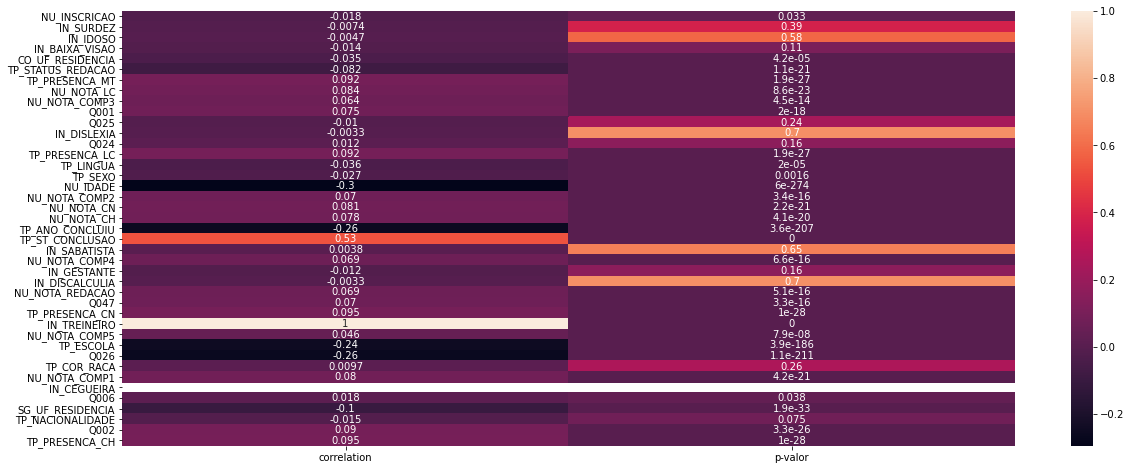

In [237]:
plt.rcParams['figure.figsize'] = (20,8)
ax = sns.heatmap(corr_biserial, annot=True)

Como esperado a maior correlação com a variável target (IN_TREINEIRO) é a feature relacionada com a conclusão do ensino médio

(0.0, 50.0)

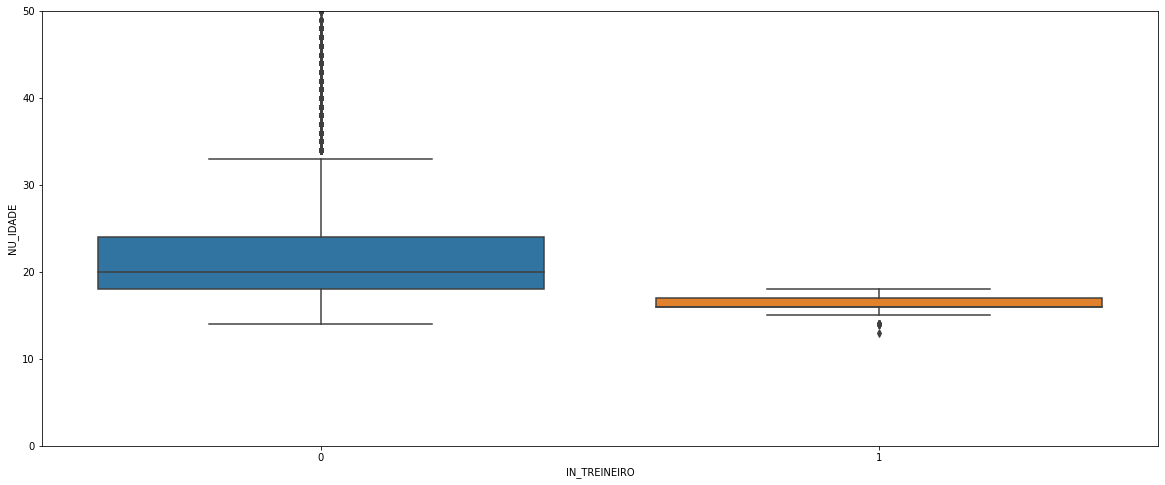

In [238]:
sns.boxplot(train['IN_TREINEIRO'], train['NU_IDADE'])
plt.ylim(0,50)

In [239]:
treineiro = train[train['IN_TREINEIRO']==1]

distribuição da idade dos treineiros

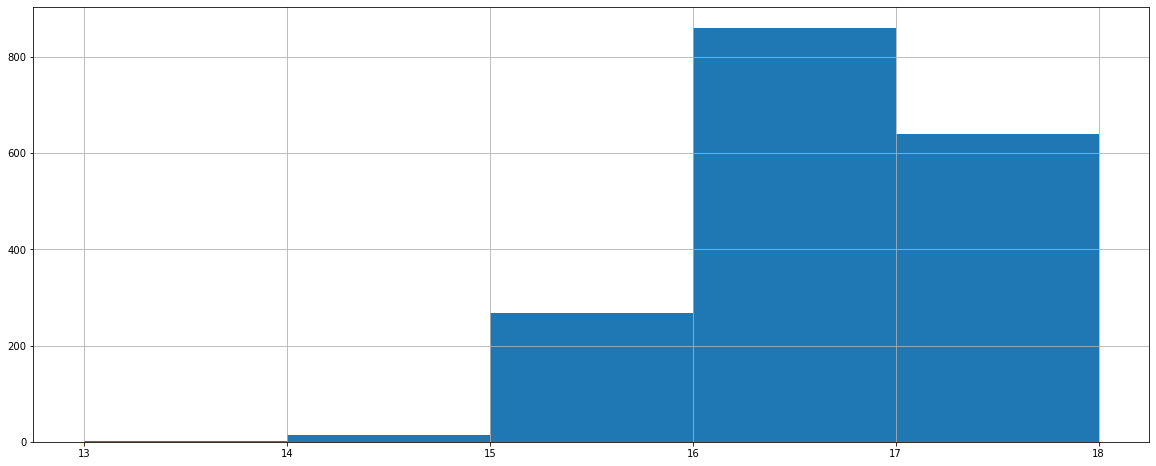

In [240]:

treineiro['NU_IDADE'].hist(bins=5)

In [245]:
features = train[['NU_IDADE','TP_ST_CONCLUSAO']]
target = train['IN_TREINEIRO']

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.25, random_state=42)

X_test = test[['NU_IDADE','TP_ST_CONCLUSAO']]

In [246]:
resultados = {}
for nome_do_classificador, modelo in classifiers:
    clf = Pipeline([
        ('min_max_scaler', minmax_scalar),
        (nome_do_classificador, modelo)])
    resultados['%s' % (nome_do_classificador)] = []
    print('%s' % nome_do_classificador)
    for score in ['accuracy', 'precision', 'recall']:
        result = cross_val_score(clf, X_train, y_train, cv=cv.split(X_train, y_train), scoring=score)
        resultados['%s' % (nome_do_classificador)].extend(result)
        print('%s' % score, '%.3f' % np.mean(result))

LogisticRegression
accuracy 0.976
precision 0.861
recall 0.977
LinearDiscriminantAnalysis
accuracy 0.958
precision 0.765
recall 0.977
XGBClassifier
accuracy 0.997
precision 1.000
recall 0.977
RandomForestClassifier
accuracy 0.984
precision 0.894
recall 1.000
GaussianNB
accuracy 0.978
precision 0.854
recall 1.000


A melhor métrica entre as escolhidas foi XGBClassifier    

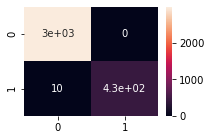

In [247]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_val, y_pred),annot=True)


Fazendo a predição

In [253]:
model.fit(features, target)

y_pred = model.predict(X_test)

In [254]:
answer = pd.DataFrame({'NU_INSCRICAO':insc,
                        'IN_TREINEIRO':y_pred})
answer.head()

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0


In [255]:
answer.to_csv('answer.csv', index=False)